# Sheet 2

First, import a few commonly-used functions

In [9]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Exercise 1: Bias-variance tradeoff for k-nearest-neighbors (knn) classifier

In [10]:
iris = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",header=None)
iris.columns = ["Sepal_length", "Sepal_width", "Petal_length", "Petal_width", "Species"]
iris.head(8)

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa


Divide the data set into train and test as done on exercise sheet 1.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

iris.columns = ["Sepal_length", "Sepal_width", "Petal_length", "Petal_width", "Species"]
X=iris[['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width']]  # Features
y=iris['Species']  # Labels

# Normalise features
X_norm = normalize(X)
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5) # 50% training and 50% test

After splitting, you will train the model on the training set.

In [13]:
#Import knn Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Create a knn Classifier
acc_train = np.zeros(15)
acc_test = np.zeros(15)
for i,knn_neighbors in enumerate(np.arange(1,30,2)):
    knnmodel = KNeighborsClassifier(n_neighbors=knn_neighbors)
    knnmodel.fit(X_train, y_train)
    acc_train[i] = accuracy_score(y_train,knnmodel.predict(X_train))
    acc_test[i]= accuracy_score(y_test,knnmodel.predict(X_test))

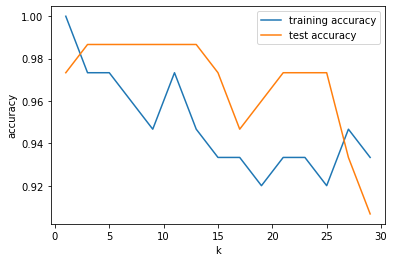

In [14]:
plt.figure()
plt.plot(np.arange(1,30,2), acc_train, label='training accuracy')
plt.plot(np.arange(1,30,2), acc_test, label='test accuracy')

plt.xlabel('k')
plt.ylabel('accuracy')
plt.legend()

# Exercise 2: Expected prediction error

We can compute, for a grid of threshold values, the average
prediction error for each of these threshold values, as:
\begin{eqnarray*}
EPE(t)=\frac{1}{2}\left(\Phi_3(t)+1-\Phi(t)\right)
\end{eqnarray*}

We can plot the theoretical EPE with:

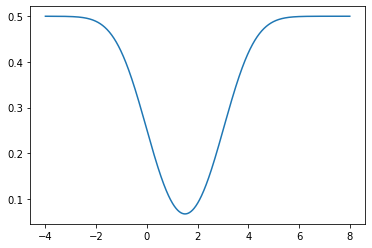

In [18]:
from scipy.stats import norm
def theoMisclas(t):
    return (norm.cdf(t,loc=3)+1-norm.cdf(t))/2

thres = np.arange(-4, 8, 0.01)
theoEPE = theoMisclas(thres)
plt.figure()
plt.plot(thres,theoEPE,label='Theoretical')

We can compute the optimal $\hat{t}$, as:
\begin{eqnarray*}
\hat{t} &=& argmin\left(EPE(t)\right)\\
&=& argmin\left(\frac{1}{2}\left(\Phi_3(t)+1-\Phi(t)\right)\right)\\
&=&\textrm{argmin}_t\left(\textrm{erf}\left(\frac{t-3}{\sqrt{2}}\right)-\textrm{erf}\left(\frac{t}{\sqrt{2}}\right)\right)\\
\end{eqnarray*}
Derivation and setting to zero yields:
\begin{eqnarray*}
0 &=& \frac{2}{4\pi}\left(e^{-(t-3)^2}-e^{-t^2}\right)\\
e^{-(t-3)^2} &=& e^{-t^2}\\
(t-3)^2 &=& t^2\\
t &=& 1.5
\end{eqnarray*}

The simulation can be done as follows:

In [41]:
N = 1000
Y = np.zeros(N)
Y[N//2:] += 1
X0 = np.random.normal(0,1,N//2)
mu = 3
X1 = np.random.normal(mu,1,N//2)
X = np.concatenate((X0,X1),axis=None)

Plot the density of the empirical
marginal distribution of $X$ and the empirical conditional distributions of $X$
divided according to the two groups,i.e. $X[Y==1]$ and $X[Y==0]$.

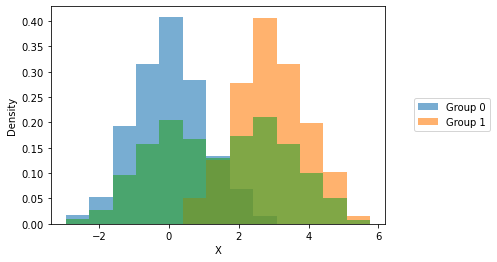

In [47]:
bins = 13
plt.figure()
plt.hist(X[Y==0], bins=bins, label='Group 0',range=(np.min(X),np.max(X)), alpha=.6, density=True)
plt.hist(X[Y==1], bins=bins, label='Group 1',range=(np.min(X),np.max(X)), alpha=.6, density=True)

plt.hist(X, bins=bins, range=(np.min(X),np.max(X)), alpha=.6, density=True)
plt.xlabel('X')
plt.ylabel('Density')
plt.legend(loc=9, bbox_to_anchor=(+1.2, 0.6))

We compute the empirical error function as:

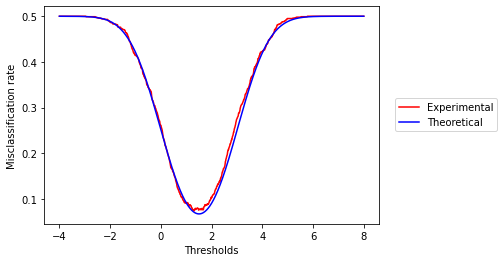

In [48]:
from scipy.stats import norm
def aveMisclas(t):
    return np.mean((X >= t) != Y)


thres = np.arange(-4, 8, 0.01)
aveMisclasFunc = np.vectorize(aveMisclas)
empEPE = aveMisclasFunc(thres)

plt.figure()
plt.plot(thres, empEPE,color='red',label='Experimental')
plt.plot(thres,theoEPE,color='blue',label='Theoretical')
plt.xlabel('Thresholds')
plt.ylabel('Misclassification rate')
plt.legend(loc=9, bbox_to_anchor=(+1.2, 0.6))

## Exercise 3 (optional): Analysis of Data on Hepatitis C

In [ ]:
import pandas as pd
HepCevol = pd.read_csv("HepCevol.txt",delimiter=' ')
HepCevol.head(5)

First we write a function that, given $\alpha$ and time value, returns the matrix of
transition probabilities. The default is time = 1 to make the function work even if we don't
specify time.

In [ ]:
def tpJC(alpha,time=1):
    tp = np.full((4,4), 0.25-0.25*np.exp(-4*alpha*time))
    tp[np.diag_indices_from(tp)] = 0.25+0.75*np.exp(-4*alpha*time)
    return tp

In [ ]:
M = tpJC(0.0005,1)
print(M)

The log likelihood function is
\begin{eqnarray*}
log \mathcal L (t,p,a) &=& log {\sum_{x,y}}p(x)^{n_{xy}}*P_\alpha^t(x,y)^{n_{xy}}\\
 &=& log {\sum_{x,y}}p(x)^{n_{xy}}+ n_{xy}log{\sum_{x,y}}P_\alpha^t(x,y).
\end{eqnarray*}
with $p(x)$ constant (0.25)<br/>
Written it in Python, we have:


In [ ]:
def mll(alpha,mutation_counts,time=1,tp = tpJC):
    return np.sum(np.log(tp(alpha,time))*mutation_counts).flatten()

To estimate $\alpha$ using MLE we need to minimize the above log likelood by taking its derivative on $\alpha$.
$$ \sum_{x\neq y}\frac{n_{x,y}}{P_\alpha^t(x,y)}(-\frac{1}{4}e^{-4\alpha t}(-4t))+\sum_{x}\frac{n_{x,x}}{P_\alpha^t(x,x)}(\frac{3}{4}e^{-4\alpha t}(-4t))=0$$

$$ \hat \alpha = \frac{1}{4t} \log \frac{3(n_1+n_2)}{3 n_1 - n_2} = \frac{1}{4t} \log \frac{3n}{3 n_1 - n_2}$$
with $n_1 = \sum_x n_{x,x}$ and $n_2 = \sum_{x \neq y} n_{x,y}$ and if and only if $3n_1>n_2.$

We implement the computation of the MLE for the given probabilistic model based on a tabulation of the
transitions.

In [ ]:
def alphahat(mutation_counts,t):
    n_xx = np.diagonal(mutation_counts).sum()
    n_xy = mutation_counts.sum()-n_xx
    if 3*n_xx>n_xy:
        alpha = 1/(4*t)*np.log(3*(n_xx+n_xy)/(3*n_xx-n_xy))
    else:
        alpha = -1*np.inf
    return alpha

Then we tabulate our data for the three segments and compute the MLEs.

Segment A, the diagonal terms are $[470, 761, 746, 555]$

In [ ]:
xSegA = np.zeros((4,4))
nucleotide = ['A','C','G','T']
for i in np.arange(4):
    for j in np.arange(4):
        if j!=i:
            xSegA[i,j]= sum((HepCevol['segment']=='A')&(HepCevol['nucleotide.77']==nucleotide[i])&(HepCevol['nucleotide.90']==nucleotide[j]))
np.fill_diagonal(xSegA, [470, 761, 746, 555])
print(xSegA)
alphahat_A = alphahat(xSegA,13)
print(alphahat_A)

SegmentB, the diagonal terms are $[252, 389, 347, 271]$

In [ ]:
xSegB = np.zeros((4,4))
nucleotide = ['A','C','G','T']
for i in np.arange(4):
    for j in np.arange(4):
        if j!=i:
            xSegB[i,j]= sum((HepCevol['segment']=='B')&(HepCevol['nucleotide.77']==nucleotide[i])&(HepCevol['nucleotide.90']==nucleotide[j]))
np.fill_diagonal(xSegB, [252, 389, 347, 271])
print('xSegB:',xSegB)
alphahat_B = alphahat(xSegB,13)
print('alphahat_B:',alphahat_B)


SegmentC, the diagnoal terms are $[230, 299, 282, 198]$

In [ ]:
xSegC = np.zeros((4,4))
nucleotide = ['A','C','G','T']
for i in np.arange(4):
    for j in np.arange(4):
        if j!=i:
            xSegC[i,j]= sum((HepCevol['segment']=='C')&(HepCevol['nucleotide.77']==nucleotide[i])&(HepCevol['nucleotide.90']==nucleotide[j]))
np.fill_diagonal(xSegC, [230, 299, 282, 198])
print('xSegC:',xSegC)
alphahat_C = alphahat(xSegC,13)
print('alphahat_C:',alphahat_C)

Make a Plot

In [ ]:
alphaCandi = np.arange(0.0001, 0.003, 0.0001)
mllExpA = np.zeros(alphaCandi.shape)
mllExpB = np.zeros(alphaCandi.shape)
mllExpC = np.zeros(alphaCandi.shape)
for i in range(alphaCandi.shape[0]):
    mllExpA[i]=mll(alphaCandi[i],xSegA,time=13)
    mllExpB[i]=mll(alphaCandi[i],xSegB,time=13)
    mllExpC[i]=mll(alphaCandi[i],xSegC,time=13)
plt.figure()
plt.plot(alphaCandi,mllExpA,color='red',label='segmentA')
plt.scatter(alphahat_A,mll(alphahat_A,xSegA,time=13),color='red')
plt.plot(alphaCandi,mllExpB,color='blue',label='segmentB')
plt.scatter(alphahat_B,mll(alphahat_B,xSegB,time=13),color='blue')
plt.plot(alphaCandi,mllExpC,color='green',label='segmentC')
plt.scatter(alphahat_C,mll(alphahat_C,xSegC,time=13),color='green')